# Electromiografía: Diagrama de Poincaré.
### Flores Oliva Alejandro Elliot
#### Licenciatura en Física Biomédica en Ciencias Biológicas , Facultad de Ciencias, Universidad Nacional Autónoma de México.

## Índice:

[1. Diagrama de Poincaré bidimensional y tridimensional.](#1)

[2. Diagrama de Poincaré con filtro Savitzky-Golay bidimensional y tridimensional.](#2)

[2. Diagrama de Poincaré con filtro Wiener bidimensional y tridimensional. ](#3)

[2. Diagrama de Poincaré con filtro Butterworth (10-400Hz) bidimensional y tridimensional.](#4)

## Diagrama de Poincaré

El diagrama Poincaré en señales EMG se construye trazando la amplitud de una muestra de la señal EMG en un eje, frente a la amplitud de la muestra siguiente en el eje perpendicular.El diagrama de Poincaré también se puede utilizar en el análisis de señales electromiográficas (EMG) para obtener información (análisis cuantitativo) sobre la actividad muscular y la variabilidad. Puede ayudar en el diagnóstico y seguimiento de condiciones neuromusculares, como trastornos del movimiento (Enfermedad de Parkinson), lesiones musculares y permite evaluar la función muscular.

El diagrama de Poincaré en señales EMG puede proporcionar algunas características útiles:

>Asimetría: la forma y orientación de los puntos pueden revelar asimetrías en la actividad muscular y patrones de contracción desequilibrados.

>Concentración: la densidad de puntos en el diagrama puede indicar la variabilidad o regularidad de la actividad muscular.

>Actividad muscular anormal: los patrones atípicos o irregulares en el diagrama pueden indicar la presencia de activación muscular anormal, como espasmos o fibrilaciones.


## Obtención y visualización de señales electromiográficas.

##### Librerías utilizadas
Importamos las librerías/ módulos que nos permitirán hacer cálculos, filtrar datos, utilizar filtros, análisis, etc.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter
from scipy.signal import wiener
from scipy.signal import butter, filtfilt

In [53]:
# Cargar el archivo .wav de dos canales
sample_rate, data = wavfile.read('../Parkinson Notebooks/1-Registros-EMG/29-01/Registro_AbdCorto_Relajación.wav')
                                 
# el archivo tiene dos canales
canal1 = data[:, 0]
canal2 = data[:, 1]

<a id='1'></a>
## Diagrama de Poincaré bidimensional y tridimensional. 

In [54]:
# Obtener las diferencias entre muestras adyacentes para cada canal
diff1 = np.diff(canal1)
diff2 = np.diff(canal2)

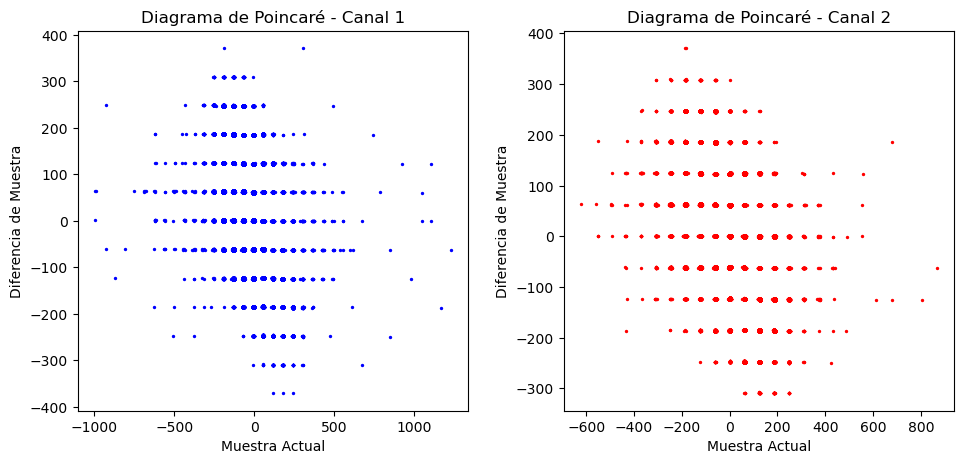

In [55]:
# Graficar el diagrama de Poincaré para el canal 1
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(canal1[:-1], diff1, c='b', s=2)
plt.title('Diagrama de Poincaré - Canal 1')
plt.xlabel('Muestra Actual')
plt.ylabel('Diferencia de Muestra')

# Graficar el diagrama de Poincaré para el canal 2
plt.subplot(122)
plt.scatter(canal2[:-1], diff2, c='r', s=2)
plt.title('Diagrama de Poincaré - Canal 2')
plt.xlabel('Muestra Actual')
plt.ylabel('Diferencia de Muestra')

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)
plt.show()

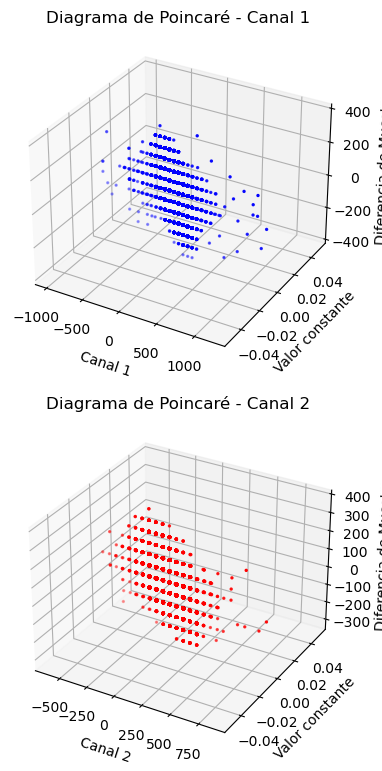

In [58]:
# Graficar el diagrama de Poincaré en 3D para el Canal 1
fig = plt.figure(figsize=(8, 8))  # Tamaño de 8x8 pulgadas
ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(canal1[:-1], np.zeros_like(canal1[:-1]), diff1, c='b', s=2)
ax1.set_xlabel('Canal 1')
ax1.set_ylabel('Valor constante')
ax1.set_zlabel('Diferencia de Muestra')
ax1.set_title('Diagrama de Poincaré - Canal 1')

# Graficar el diagrama de Poincaré en 3D para el Canal 2
ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter(canal2[:-1], np.zeros_like(canal2[:-1]), diff2, c='r', s=2)
ax2.set_xlabel('Canal 2')
ax2.set_ylabel('Valor constante')
ax2.set_zlabel('Diferencia de Muestra')
ax2.set_title('Diagrama de Poincaré - Canal 2')

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)
plt.show()

<a id='3'></a>
## Diagrama de Poincaré con filtro Savitzky-Golay bidimensional y tridimensional. 

In [71]:
# Aplicar el filtro Savitzky-Golay de segundo orden a cada canal
window_length = 51  # Longitud de la ventana
polyorder = 2  # Orden del polinomio para el ajuste
canal1_filtroSavitzkyGolay = savgol_filter(canal_1, window_length, polyorder)
canal2_filtroSavitzkyGolay= savgol_filter(canal_2, window_length, polyorder)

# Obtener las diferencias entre muestras adyacentes para cada canal
diff_1 = np.diff(canal1_filtroSavitzkyGolay)
diff_2 = np.diff(canal2_filtroSavitzkyGolay)

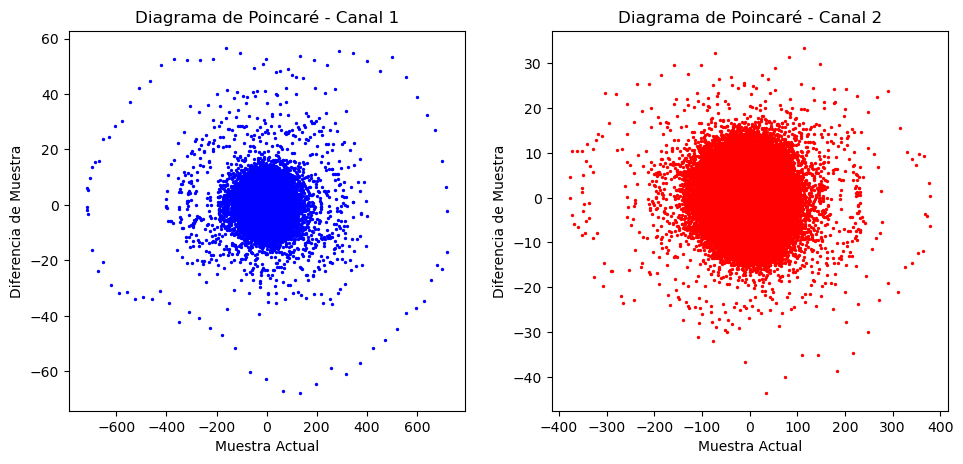

In [73]:
# Graficar el diagrama de Poincaré para el canal 1
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(canal1_filtroSavitzkyGolay[:-1], diff_1, c='b', s=2)
plt.title('Diagrama de Poincaré - Canal 1')
plt.xlabel('Muestra Actual')
plt.ylabel('Diferencia de Muestra')

# Graficar el diagrama de Poincaré para el canal 2
plt.subplot(122)
plt.scatter(canal2_filtroSavitzkyGolay[:-1], diff_2, c='r' ,s=2)
plt.title('Diagrama de Poincaré - Canal 2')
plt.xlabel('Muestra Actual')
plt.ylabel('Diferencia de Muestra')

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)
plt.show()

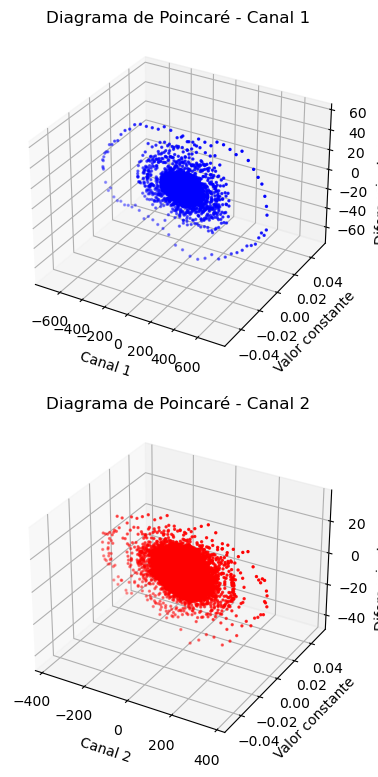

In [61]:
# Graficar el diagrama de Poincaré en 3D para el canal 1
fig = plt.figure(figsize=(8, 8))  # Tamaño de 8x8 pulgadas
ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(canal1_filtroSavitzkyGolay[:-1], np.zeros_like(canal1_filtroSavitzkyGolay[:-1]), diff_1, c='b', s=2)
ax1.set_xlabel('Canal 1')
ax1.set_ylabel('Valor constante')
ax1.set_zlabel('Diferencia de Muestra')
ax1.set_title('Diagrama de Poincaré - Canal 1')

# Graficar el diagrama de Poincaré en 3D para el canal 2
ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter(canal2_filtroSavitzkyGolay[:-1], np.zeros_like(canal2_filtroSavitzkyGolay[:-1]), diff_2, c='r', s=2)
ax2.set_xlabel('Canal 2')
ax2.set_ylabel('Valor constante')
ax2.set_zlabel('Diferencia de Muestra')
ax2.set_title('Diagrama de Poincaré - Canal 2')

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)
plt.show()

<a id='3'></a>
## Diagrama de Poincaré con filtro Wiener bidimensional y tridimensional. 

In [66]:
# Aplicar el filtro Wiener a cada canal
canal1_filtroWiener = wiener(canal1, mysize=25)
canal2_filtroWiener = wiener(canal2, mysize=25)

# Obtener las diferencias entre muestras adyacentes para cada canal
difff_1 = np.diff(canal1_filtroWiener)
difff_2 = np.diff(canal2_filtroWiener)

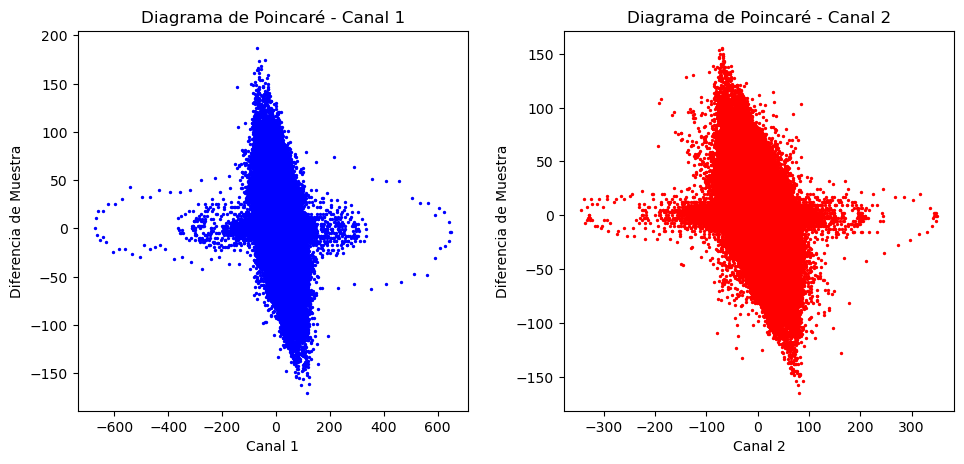

In [67]:
# Graficar el diagrama de Poincaré para el Canal 1
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(canal1_filtroWiener[:-1], difff_1, c='b', s=2)
plt.xlabel('Canal 1')
plt.ylabel('Diferencia de Muestra')
plt.title('Diagrama de Poincaré - Canal 1')

# Graficar el diagrama de Poincaré para el Canal 2
plt.subplot(122)
plt.scatter(canal2_filtroWiener[:-1], difff_2, c='r', s=2)
plt.xlabel('Canal 2')
plt.ylabel('Diferencia de Muestra')
plt.title('Diagrama de Poincaré - Canal 2')

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)
plt.show()

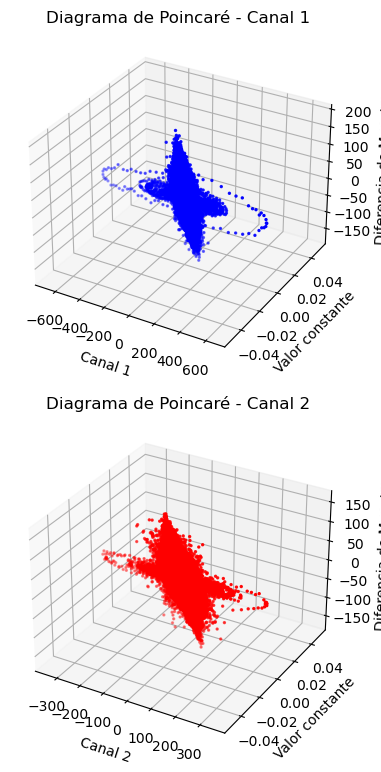

In [68]:
# Graficar el diagrama de Poincaré en 3D para el canal 1
fig = plt.figure(figsize=(8, 8))  # Tamaño de 8x8 pulgadas
ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(canal1_filtroWiener[:-1], np.zeros_like(canal1_filtroWiener[:-1]), difff_1, c='b', s=2)
ax1.set_xlabel('Canal 1')
ax1.set_ylabel('Valor constante')
ax1.set_zlabel('Diferencia de Muestra')
ax1.set_title('Diagrama de Poincaré - Canal 1')

# Graficar el diagrama de Poincaré en 3D para el canal 2
ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter(canal2_filtroWiener[:-1], np.zeros_like(canal2_filtroWiener[:-1]), difff_2, c='r', s=2)
ax2.set_xlabel('Canal 2')
ax2.set_ylabel('Valor constante')
ax2.set_zlabel('Diferencia de Muestra')
ax2.set_title('Diagrama de Poincaré - Canal 2')

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)
plt.show()

<a id='4'></a>
## Diagrama de Poincaré con filtro Butterworth (10-400Hz) bidimensional y tridimensional.

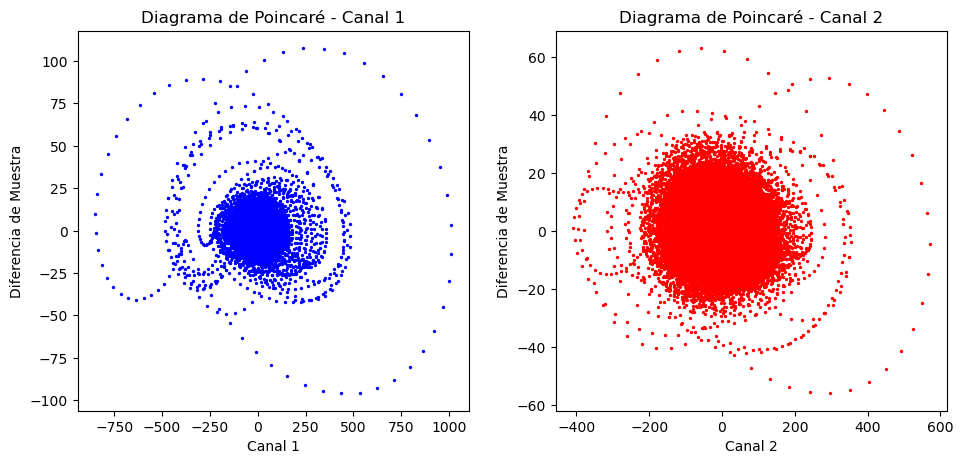

In [69]:
# Definir la frecuencia de corte para el filtro Butterworth (10-400Hz)
frec_corte_baja = 10
frec_corte_alta = 400
frec_nyquist = 0.5 * sample_rate
frec_corte_baja_normalizada = frec_corte_baja / frec_nyquist
frec_corte_alta_normalizada = frec_corte_alta / frec_nyquist

# Crear los coeficientes del filtro Butterworth de paso banda
orden = 4
b, a = butter(orden, [frec_corte_baja_normalizada, frec_corte_alta_normalizada], btype='band')

# Aplicar el filtro Butterworth de paso banda a cada canal
canal_1_filtroButterworth = filtfilt(b, a, canal1)
canal_2_filtroButterworth = filtfilt(b, a, canal2)

# Obtener las diferencias entre muestras adyacentes para cada canal
diff_11 = np.diff(canal_1_filtroButterworth )
diff_21 = np.diff(canal_2_filtroButterworth)

# Graficar el diagrama de Poincaré para el Canal 1
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(canal_1_filtroButterworth [:-1], diff_11, c='b', s=2)
plt.xlabel('Canal 1')
plt.ylabel('Diferencia de Muestra')
plt.title('Diagrama de Poincaré - Canal 1')

# Graficar el diagrama de Poincaré para el Canal 2
plt.subplot(122)
plt.scatter(canal_2_filtroButterworth[:-1], diff_21, c='r', s=2)
plt.xlabel('Canal 2')
plt.ylabel('Diferencia de Muestra')
plt.title('Diagrama de Poincaré - Canal 2')

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)
plt.show()

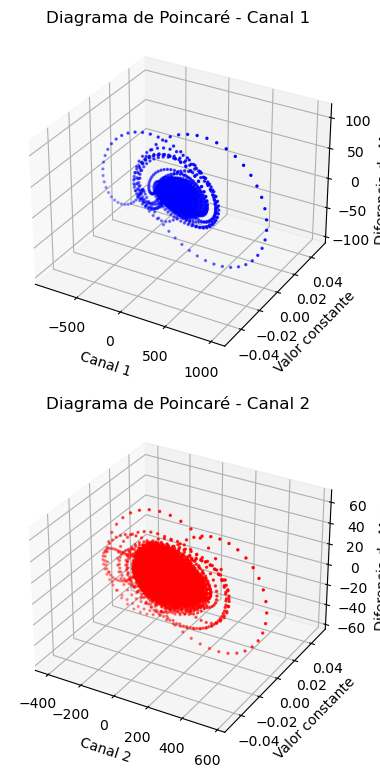

In [70]:
# Diseñar el filtro Butterworth de paso banda
b, a = butter(orden, [frec_corte_baja_normalizada, frec_corte_alta_normalizada], btype='band')

# Aplicar el filtro Butterworth de paso banda a cada canal
canal1_filButterworth= filtfilt(b, a, canal1)
canal2_filButterworth = filtfilt(b, a, canal2)

# Obtener las diferencias entre muestras adyacentes para cada canal
diff_12 = np.diff(canal1_filButterworth)
diff_22 = np.diff(canal2_filButterworth)

# Graficar el diagrama de Poincaré en 3D para el canal 1
fig = plt.figure(figsize=(8, 8))  # Tamaño de 8x8 pulgadas
ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(canal1_filButterworth[:-1], np.zeros_like(canal1_filButterworth[:-1]), diff_12, c='b', s=2)
ax1.set_xlabel('Canal 1')
ax1.set_ylabel('Valor constante')
ax1.set_zlabel('Diferencia de Muestra')
ax1.set_title('Diagrama de Poincaré - Canal 1')

# Graficar el diagrama de Poincaré en 3D para el canal 2
ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter(canal2_filButterworth[:-1], np.zeros_like(canal2_filButterworth[:-1]), diff_22, c='r', s=2)
ax2.set_xlabel('Canal 2')
ax2.set_ylabel('Valor constante')
ax2.set_zlabel('Diferencia de Muestra')
ax2.set_title('Diagrama de Poincaré - Canal 2')

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)
plt.show()

Registros y Notebook elaborado por Alejandro Elliot Flores Oliva, licenciatura en Física Biomédica, Facultad de Ciencias, Universidad Autónoma de México (UNAM), correo: elliotflooli@ciencias.unam.mx